In [16]:
import sqlite3
import pandas as pd

testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')

def dataOfTester(tester):
    return 'SELECT * FROM '+tester

def createDataframe(tester):
    tester_df=pd.read_sql_query(dataOfTester(tester),conn)
    if(tester=='S015' or tester=='S021'):
            tester_df=tester_df.drop(columns=['index'])
    if(tester=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
    return tester_df

tester_df = [createDataframe(tester) for tester in testers]

tester_df[0]['timestamp']=pd.to_datetime(tester_df[0]['timestamp'])
timedelta_list = []

for df in tester_df:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timedelta = df['timestamp'].iloc[1] - df['timestamp'].iloc[0]
    timedelta_list.append(timedelta)

print(timedelta_list)
for i in range(len(testers)):
    tester_df[i]['timestamp']=pd.to_datetime(tester_df[i]['timestamp'])
    interval=timedelta_list[i]
    tester_df[i]['sample']=(tester_df[i]['timestamp']-tester_df[i]['timestamp'].iloc[0])//interval
    tester_df[i].drop(columns=['timestamp'],inplace=True)



      
# tester_df[0]['sample']=(tester_df[0]['timestamp']-tester_df[0]['timestamp'].iloc[0])//interval
# tester_df[0].drop(columns=['timestamp'],inplace=True)



tester_df[4].head()



[Timedelta('0 days 00:00:00.010000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.019999995'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000'), Timedelta('0 days 00:00:00.020000')]


,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,sample
0,-3.810360,0.165219,-0.663742,-0.919657,-0.759899,0.239633,6,0
1,-0.188988,-0.235452,-1.343093,-0.137463,-0.852652,-1.423640,6,1
2,-0.060000,0.008919,-0.876293,1.347957,-0.642281,-2.081678,6,2
3,-1.222393,0.028038,-0.460220,1.063477,-2.840740,-0.143171,6,3
4,-1.026113,-0.170239,-0.163068,-3.239610,0.924564,-0.720399,6,4


In [17]:
#lets create the rolling window
rolling_window=[0]*len(tester_df)
for i in range(len(tester_df)):
    rolling_window[i] = tester_df[i].iloc[:,:-2].rolling(window=10,center=True).mean()
    rolling_window[i]['label']=tester_df[i]['label']
    rolling_window[i].bfill(limit=5, inplace=True)
    rolling_window[i].ffill(limit=5, inplace=True)

for i in rolling_window:
    print(i.tail(10))





          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
408699 -0.718071  0.035292 -0.691135  0.063827  0.068942  1.002220      7
408700 -0.716116  0.034737 -0.691002  0.073453  0.069298  1.001427      7
408701 -0.717247  0.034221 -0.689879  0.061229  0.068797  1.003284      7
408702 -0.715693  0.034660 -0.691207  0.077474  0.069538  1.001981      7
408703 -0.717548  0.034044 -0.689069  0.054243  0.068358  1.003505      7
408704 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408705 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408706 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408707 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
408708 -0.715584  0.035240 -0.693636  0.092638  0.070502  1.000754      7
          back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
418979 -0.990182 -0.169308 -0.198136 -0.988800 -0.129428 -0.075978      3
418980 -0.986373 -0.163015 -0.199718 -

In [18]:
unified_df=pd.concat(rolling_window,ignore_index=True)

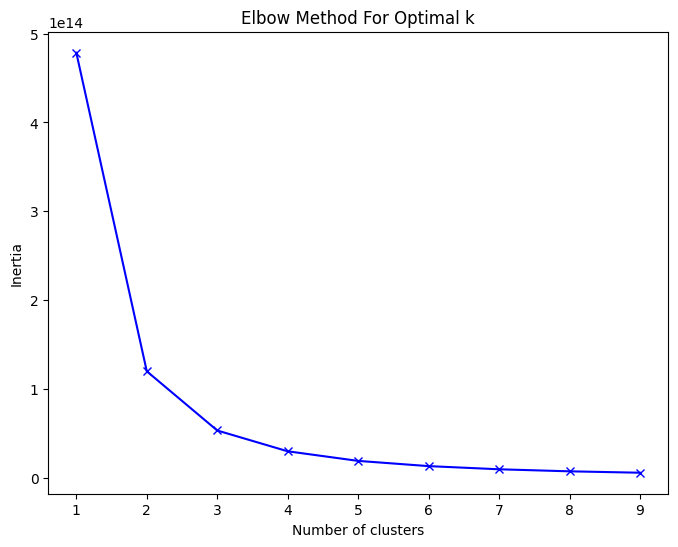

    back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  Cluster
0 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        0
1 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        0
2 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        0
3 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        0
4 -0.87638  0.114158  0.076672 -1.130216 -0.063653 -0.159632        0
           back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
Cluster                                                            
0       -0.995959 -0.034849 -0.121980 -1.056971 -0.025241 -0.116221
1       -0.861661 -0.010563 -0.252183 -0.236887  0.083333  0.912628
2       -0.256324  0.124434  0.175911 -0.176688 -0.162491 -0.504744


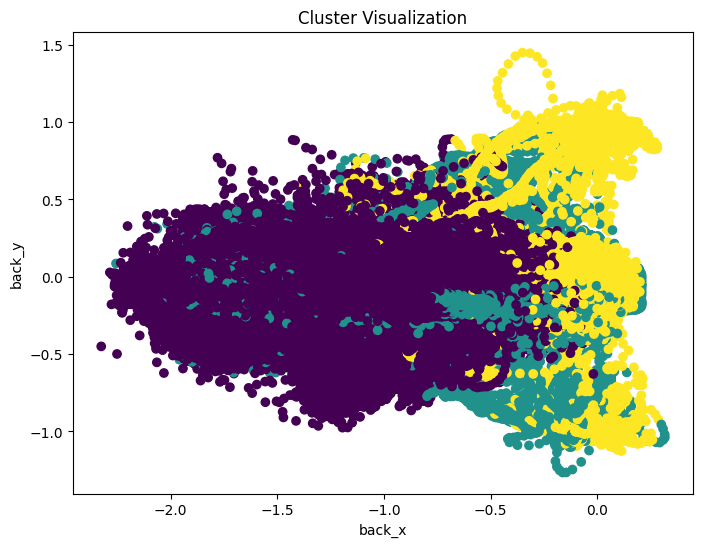

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

review=unified_df['label']
unified_df.drop(columns=['sample','label'],inplace=True,errors='ignore')

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply KMeans with the chosen number of clusters (assumed 3 for this example)
kmeans = KMeans(n_clusters=3, random_state=0)
unified_df['Cluster'] = kmeans.fit_predict(unified_df)

# Display the first few rows of the dataframe with the cluster labels
print(unified_df.head())

# Analyze the clusters
print(unified_df.groupby('Cluster').mean())

# Plot the clusters (optional)
plt.figure(figsize=(8, 6))
plt.scatter(unified_df['back_x'], unified_df['back_y'], c=unified_df['Cluster'], cmap='viridis')
plt.xlabel('back_x')
plt.ylabel('back_y')
plt.title('Cluster Visualization')
plt.show()


In [20]:
# Compare the 'label' column with the 'Cluster' column
comparison = pd.merge(unified_df, pd.DataFrame({'review': review}), left_index=True, right_index=True)
contingency_table = pd.crosstab(comparison['review'], comparison['Cluster'])
print(contingency_table)

Cluster        0        1       2
review                           
1        1138269    39254   19632
2         214029    28271   49056
3         248882     5253     704
4          71241     3119    1857
5          65495     1300     458
6         728337    14403     740
7           5835  2841411   55457
8            166   213135  215597
13        279982    78210   35771
14         50873     1467    3474
130        38388     2782     615
140         7287      578       0
